This notebook generates a graph of the Donegal road network. The graph is created from OpenStreetMap data using osmnx and saved as a graphml file. 

In [1]:
import config
import osmnx as ox
import networkx as nx

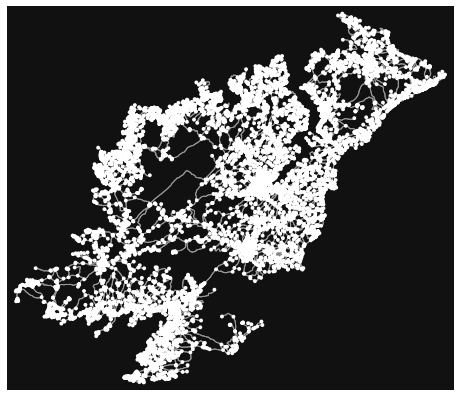

In [3]:
G = ox.graph_from_place("Donegal, Ireland", network_type="drive")
graph_file = f"{config.graph_path}/graphml/donegal_osm.graphml"
ox.save_graphml(G, filepath=graph_file)
fig, ax = ox.plot_graph(G, save=True)

The graph will now be simplified by removing edges that do not represent either primary, secondary, tertiary or trunk roads. This will remove areas that are not feasible for bus route coverage.

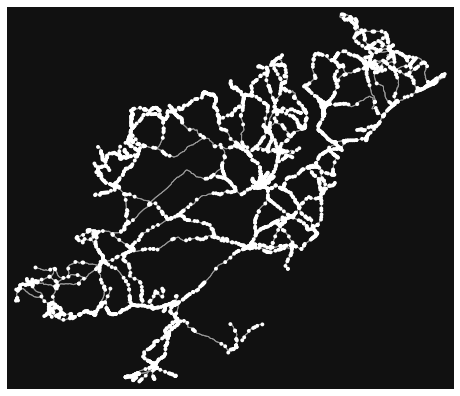

In [8]:
G = ox.load_graphml(graph_file)

# to geodataframe, access edge info.
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# removing non-primary/secondary/tertiary roads
exclude_roads = edges[(edges["highway"] != "primary") &
                          (edges["highway"] != "secondary") &
                          (edges["highway"] != "tertiary") &
                          (edges["highway"] != "trunk")]
edge_nodes = exclude_roads[["u", "v"]]
node_tuples = list(edge_nodes.itertuples(index=False, name=None))
G.remove_edges_from(node_tuples)

# remove unconnected nodes
G.remove_nodes_from(list(nx.isolates(G)))

ox.save_graphml(G, filepath=f"{config.graph_path}/graphml/donegal_osm_simplified.graphml")

fig, ax = ox.plot_graph(G, save=True)

In [9]:
len(G.edges)

7252

Reduced to 7252 edges which will help when running the pathfinding algorithm later